In [25]:
# Re-defining parameters
n_samples = 1000

industries = ["Construction", "Healthcare", "Retail", "Manufacturing", "Education"]
injury_types = ["Musculoskeletal", "Fracture", "Mental Health", "Burn", "Other"]
work_duties = ["Full Duty", "Modified Duty", "No Duty"]

# Setting random seed
np.random.seed(42)

# New dataset generation with improvements
data = {
    "Worker_ID": np.arange(1, n_samples + 1),
    "Age": np.random.randint(20, 65, size=n_samples),
    "Gender": np.random.choice(["Male", "Female"], size=n_samples),
    "Industry": np.random.choice(industries, size=n_samples),
    "Injury_Type": np.random.choice(injury_types, size=n_samples),
    "Injury_Severity": np.random.choice(["Mild", "Moderate", "Severe"], size=n_samples, p=[0.5, 0.35, 0.15]),
    "Work_Duty_Type": np.random.choice(work_duties, size=n_samples),
    "Mental_Health_Score": np.random.uniform(1, 10, size=n_samples),  # Inversely correlated with return time
}

df = pd.DataFrame(data)

# Assigning Days_to_Return based on Injury Severity
severity_mapping = {"Mild": 40, "Moderate": 100, "Severe": 180}
df["Base_Days"] = df["Injury_Severity"].map(severity_mapping)

# Adjusting with additional factors
df["Days_to_Return"] = (
    df["Base_Days"] +
    np.random.normal(0, 15, size=n_samples) +  # Some random variation
    (df["Age"] - 20) * 0.8 -  # Older workers take longer
    (df["Mental_Health_Score"] * 4)  # Better mental health leads to shorter recovery
)

# Ensure days are at least 1
df["Days_to_Return"] = np.clip(df["Days_to_Return"], 1, 365).astype(int)

# Adjusting Claim_Closed probability based on Days_to_Return
df["Claim_Closed"] = np.where(df["Days_to_Return"] < 150, 1, np.random.choice([1, 0], p=[0.6, 0.4], size=n_samples))

# Save dataset for manual analysis (without running Cox model due to package unavailability)
df.to_csv("adjusted_workforce_return_dataset.csv", index=False)

# Returning a preview
df.head()



,Worker_ID,Age,Gender,Industry,Injury_Type,Injury_Severity,Work_Duty_Type,Mental_Health_Score,Base_Days,Days_to_Return,Claim_Closed
0,1,58,Male,Education,Fracture,Severe,Full Duty,2.453121,180,191,0
1,2,48,Female,Retail,Other,Moderate,Full Duty,5.245659,100,114,1
2,3,34,Female,Construction,Musculoskeletal,Severe,Full Duty,5.981246,180,192,0
3,4,62,Female,Construction,Mental Health,Moderate,No Duty,6.132582,100,103,1
4,5,27,Female,Manufacturing,Mental Health,Moderate,Modified Duty,2.890965,100,104,1


<lifelines.CoxPHFitter: fitted with 1000 total observations, 51 right-censored observations>
             duration col = 'Days_to_Return'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 949
   partial log-likelihood = -4625.11
         time fit was run = 2025-01-29 05:27:12 UTC

---
                              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                     
Age                          -0.05      0.95      0.00           -0.06           -0.04                0.95                0.96
Mental_Health_Score           0.26      1.30      0.01            0.23            0.29                1.26                1.33
Gender_Male                  -0.16      0.85      0.07           -0.29           -0.03                0.75                0.97
Industry_Education           -0.12      0.89      0.10           -0.33            0.08                0.72                1.09
Industry_Healthcare          -0.12      0.88      0.10           -0.33            0.08                0.72                1.08
Industry_Manufacturing       -0.24      0.79      0.10           -0.44           -0.04                0.64                0.96
Industry_Retail              -0.06      0.94      0.11           -0.27            0.16                0.76                1.17
Injury_Type_Fracture          0.11      1.12      0.11           -0.10            0.32                0.91                1.38
Injury_Type_Mental Health     0.03      1.03      0.10           -0.17            0.23                0.84                1.26
Injury_Type_Musculoskeletal   0.09      1.09      0.10           -0.11            0.29                0.89                1.33
Injury_Type_Other             0.03      1.04      0.10           -0.17            0.24                0.84                1.27
Injury_Severity_Moderate     -4.21      0.01      0.14           -4.49           -3.92                0.01                0.02
Injury_Severity_Severe       -9.71      0.00      0.35          -10.39           -9.03                0.00                0.00
Work_Duty_Type_Modified Duty  0.09      1.09      0.08           -0.08            0.25                0.93                1.29
Work_Duty_Type_No Duty        0.07      1.07      0.08           -0.09            0.23                0.91                1.26

                              cmp to      z      p  -log2(p)
covariate                                                   
Age                             0.00 -17.61 <0.005    228.23
Mental_Health_Score             0.00  18.41 <0.005    248.91
Gender_Male                     0.00  -2.45   0.01      6.12
Industry_Education              0.00  -1.16   0.25      2.02
Industry_Healthcare             0.00  -1.18   0.24      2.08
Industry_Manufacturing          0.00  -2.32   0.02      5.60
Industry_Retail                 0.00  -0.52   0.60      0.73
Injury_Type_Fracture            0.00   1.07   0.29      1.81
Injury_Type_Mental Health       0.00   0.29   0.77      0.37
Injury_Type_Musculoskeletal     0.00   0.84   0.40      1.32
Injury_Type_Other               0.00   0.33   0.74      0.44
Injury_Severity_Moderate        0.00 -29.04 <0.005    613.40
Injury_Severity_Severe          0.00 -28.07 <0.005    573.60
Work_Duty_Type_Modified Duty    0.00   1.05   0.29      1.77
Work_Duty_Type_No Duty          0.00   0.85   0.40      1.34
---
Concordance = 0.90
Partial AIC = 9280.22
log-likelihood ratio test = 2179.37 on 15 df
-log2(p) of ll-ratio test = inf

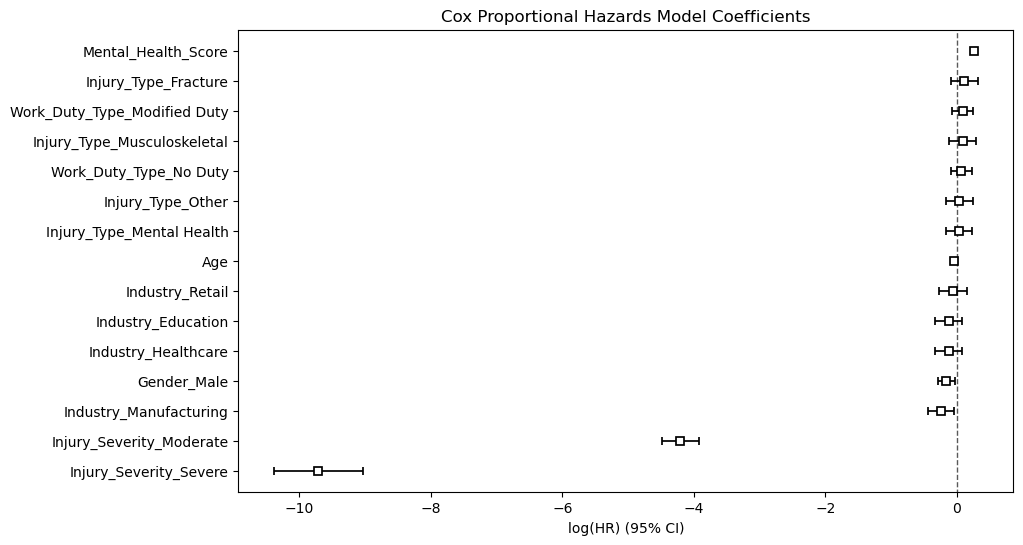

<Figure size 1000x600 with 0 Axes>

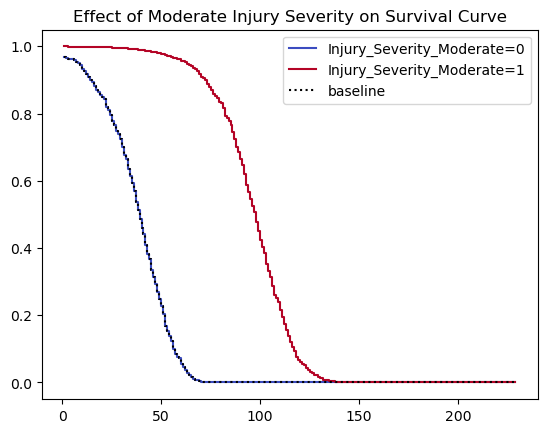

In [26]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from lifelines import CoxPHFitter

#Load the dataset (assuming it's saved as 'return_to_work_data.csv')

#df = pd.read_csv("return_to_work_data.csv")

#Select relevant columns

df = df[["Age", "Gender", "Industry", "Injury_Type", "Injury_Severity",

"Days_to_Return", "Claim_Closed", "Work_Duty_Type", "Mental_Health_Score"]]

#Convert categorical variables into dummy variables

df = pd.get_dummies(df, columns=["Gender", "Industry", "Injury_Type", "Injury_Severity", "Work_Duty_Type"], drop_first=True)

#Rename columns for clarity

df.rename(columns={"Claim_Closed": "Event"}, inplace=True)  # 1 = claim closed (event occurred), 0 = censored

#Initialize and fit the Cox Proportional Hazards model

cph = CoxPHFitter()

cph.fit(df, duration_col="Days_to_Return", event_col="Event")

#Print summary (Hazard Ratios and statistical significance)

cph.print_summary()

#Plot survival function

plt.figure(figsize=(10, 6))

cph.plot()

plt.title("Cox Proportional Hazards Model Coefficients")

plt.show()

#Plot survival curves for a key variable (e.g., Injury Severity)

plt.figure(figsize=(10, 6))

cph.plot_partial_effects_on_outcome(covariates="Injury_Severity_Moderate", values=[0, 1], cmap="coolwarm")

plt.title("Effect of Moderate Injury Severity on Survival Curve")

plt.show()

